<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/telco_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Analysis
In this analysis, I am setting out to answer two business questions
1. How to efficiently and quickly compare different ML algorithms in the classification of the telco churn dataset
2. What are the top determinants of churn? In each of the determinant, what would likely lead to churn and what would not?

In [ ]:
pip install pycaret shap sweetviz

     |████████████████████████████████| 266kB 8.6MB/s 
     |████████████████████████████████| 358kB 8.7MB/s 
     |████████████████████████████████| 15.1MB 299kB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 276kB 37.7MB/s 
     |████████████████████████████████| 1.8MB 30.8MB/s 
     |████████████████████████████████| 14.2MB 235kB/s 
     |████████████████████████████████| 1.7MB 34.4MB/s 
     |████████████████████████████████| 245kB 50.9MB/s 
     |████████████████████████████████| 215kB 52.9MB/s 
     |████████████████████████████████| 6.8MB 41.9MB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 163kB 38.4MB/s 
     |████████████████████████████████| 153kB 46.0MB/s 
     |████████████████████████████████| 1.1MB 40.2MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 1.1MB 44.6MB/s 


In [ ]:
import sweetviz as sv
import pandas as pd


In [ ]:
telco_df = pd.read_csv('telecom_users.csv')
telco_df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


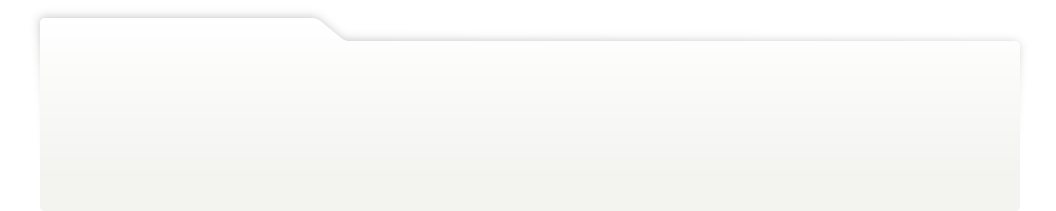
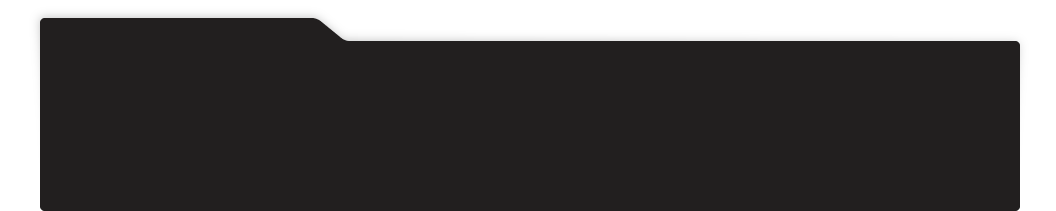
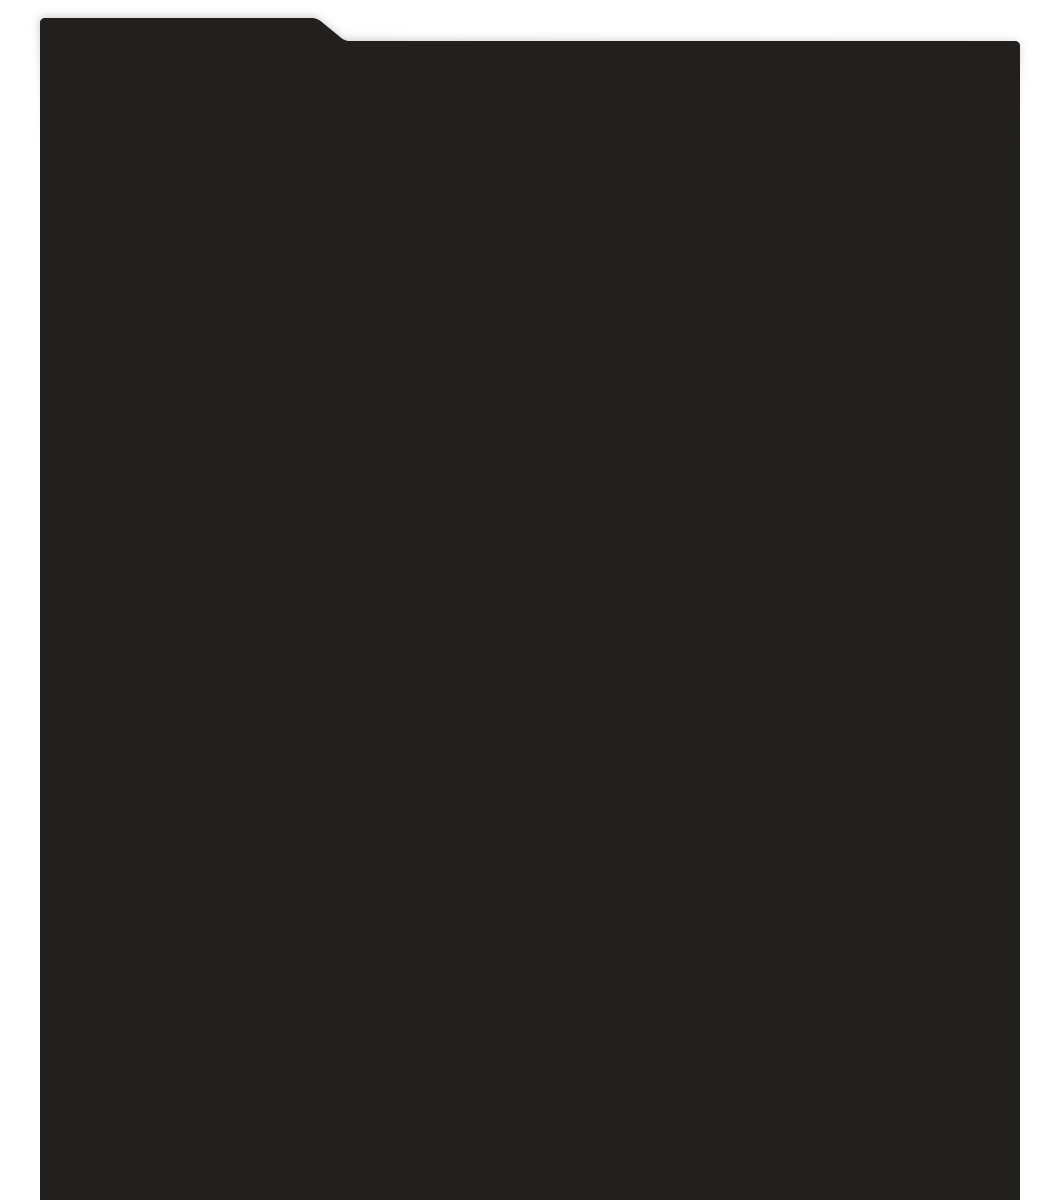
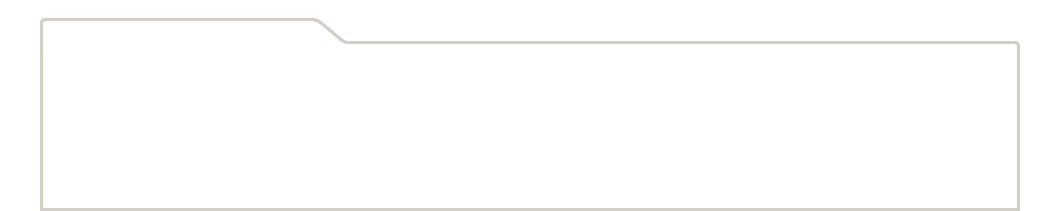
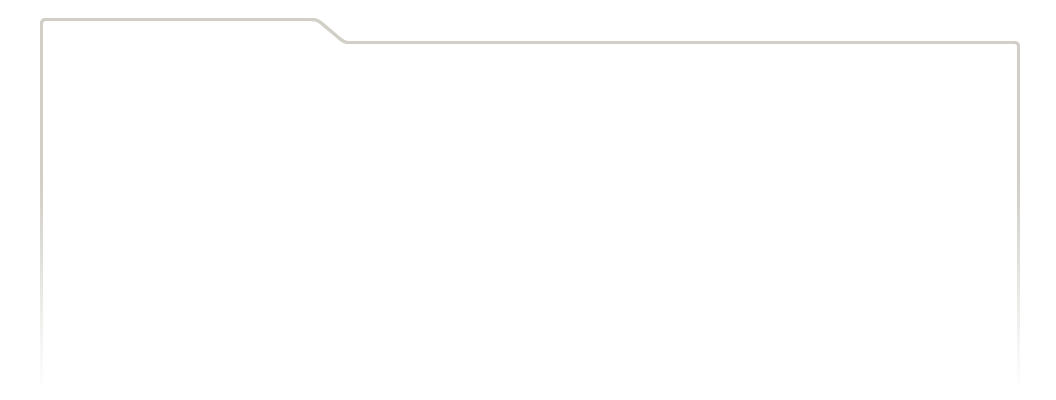
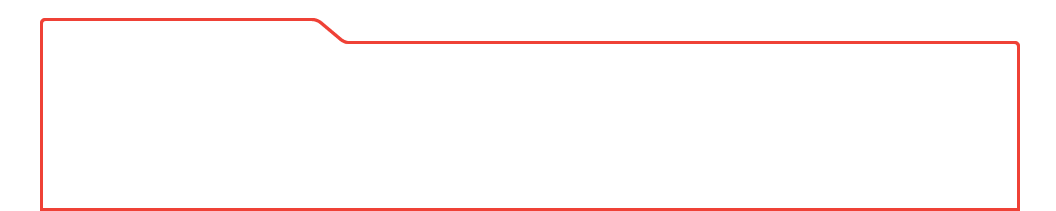
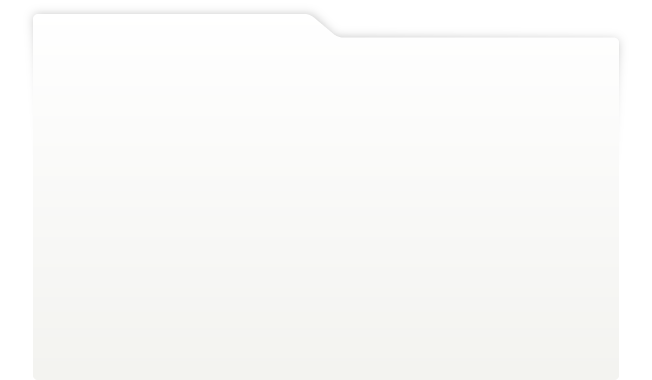
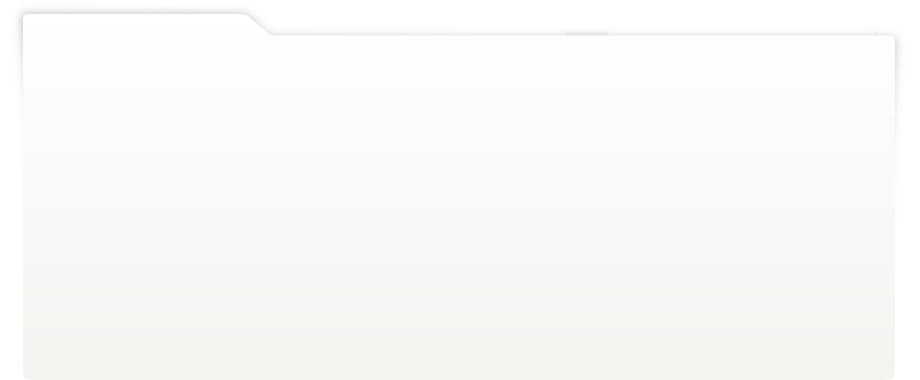
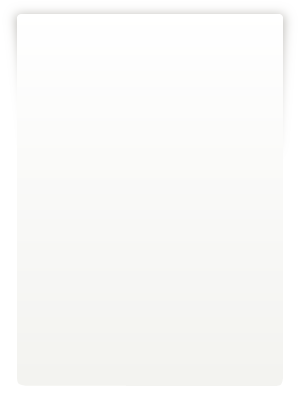
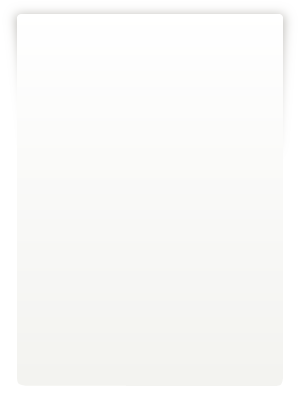
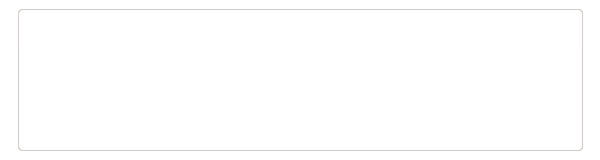
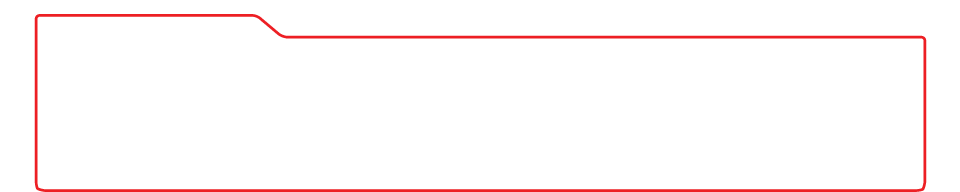
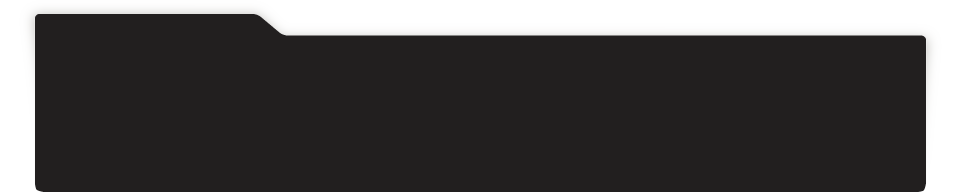
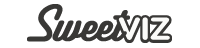
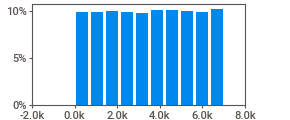
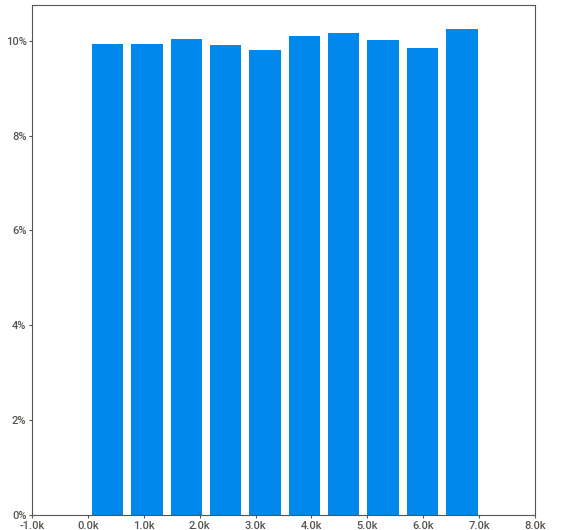
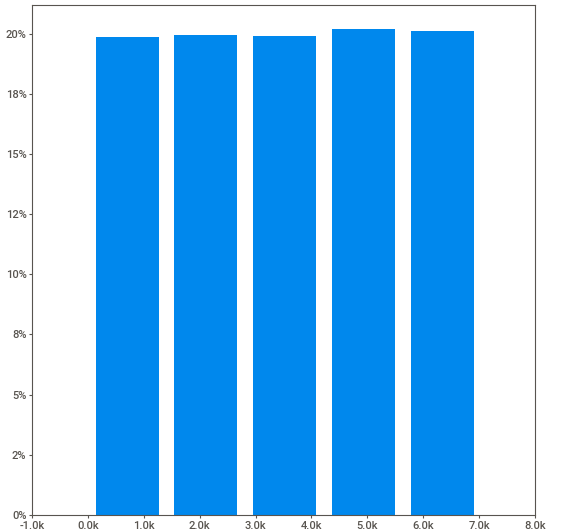
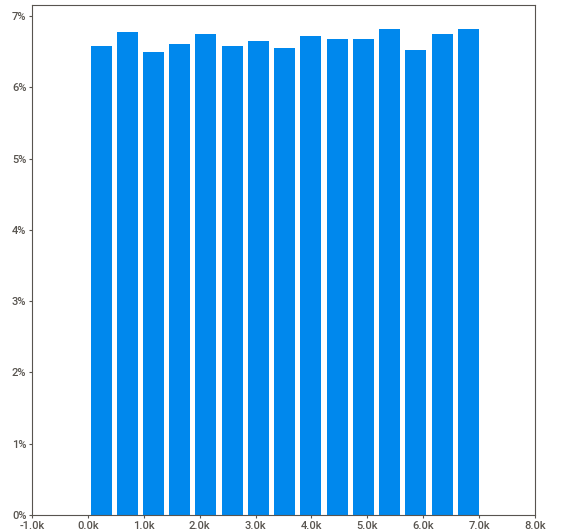
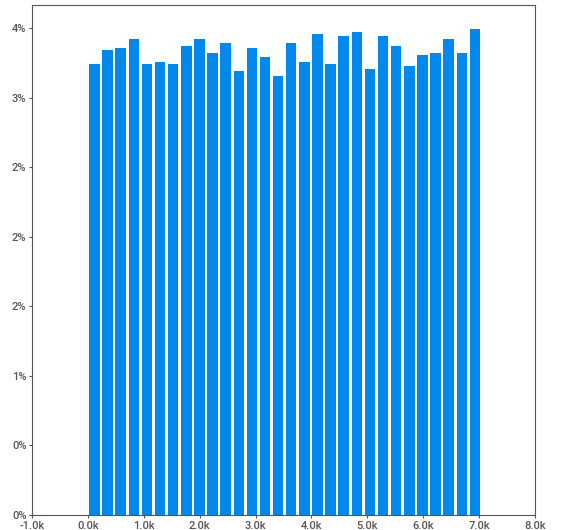
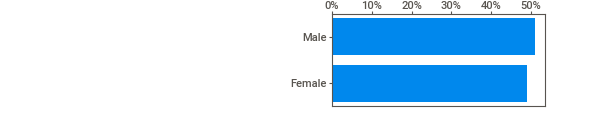
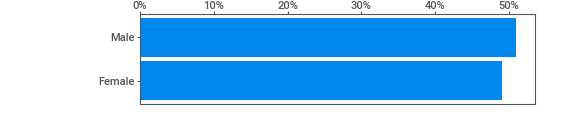
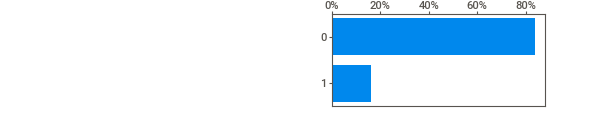
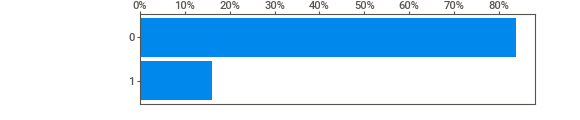
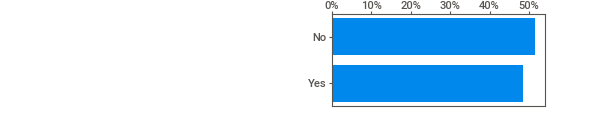
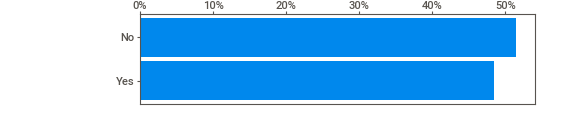
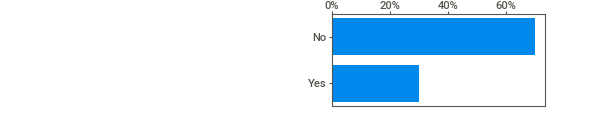
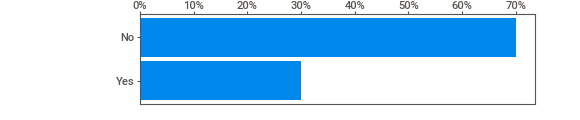
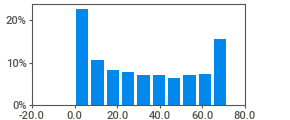
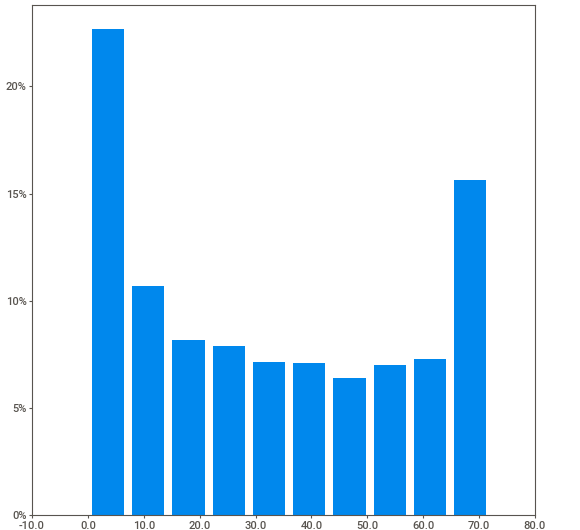
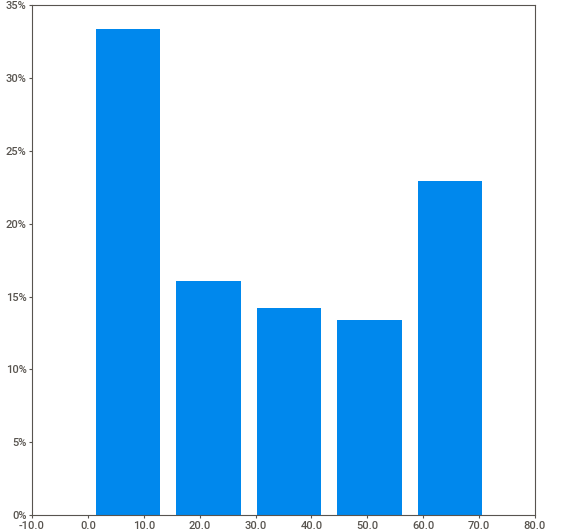
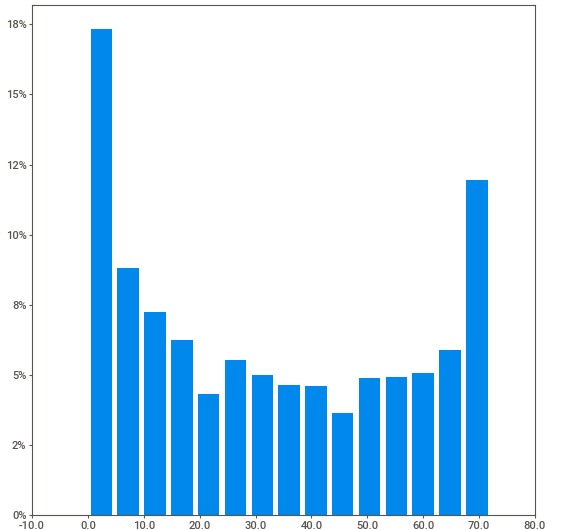
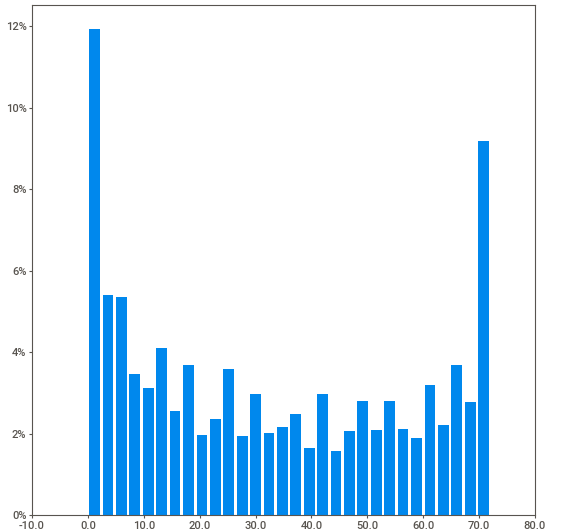
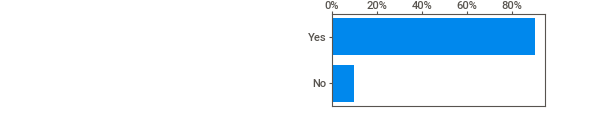
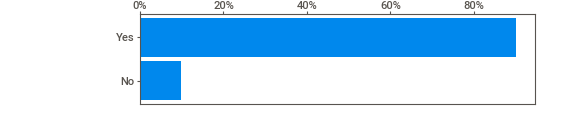
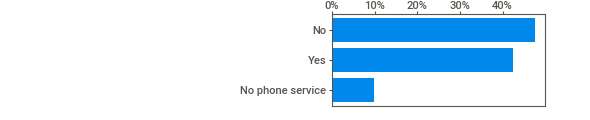
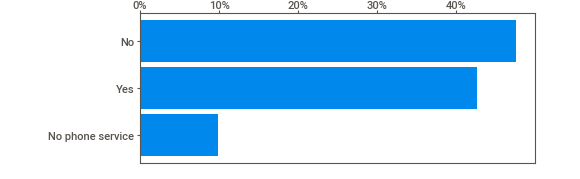
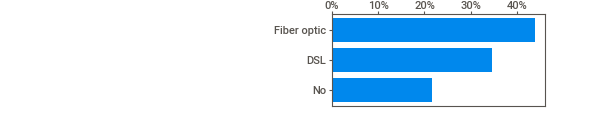
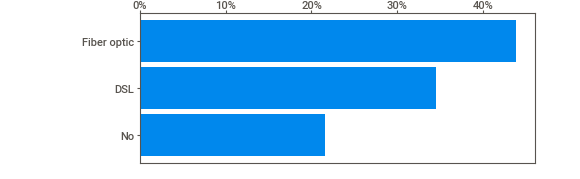
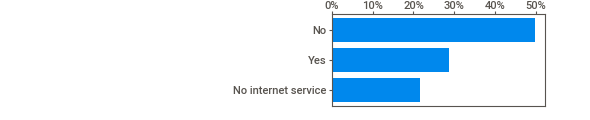
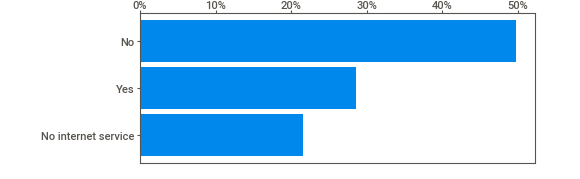
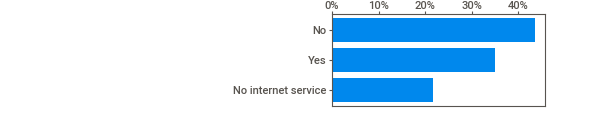
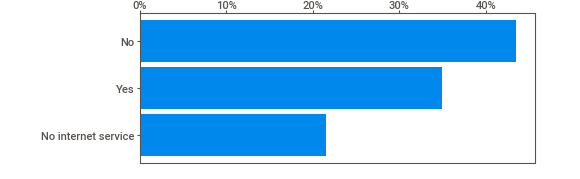
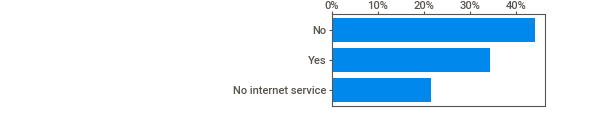
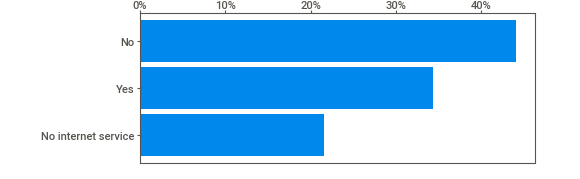
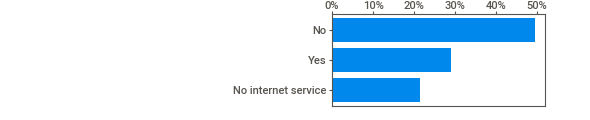
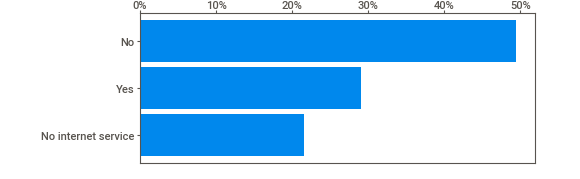
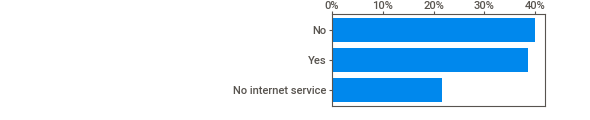
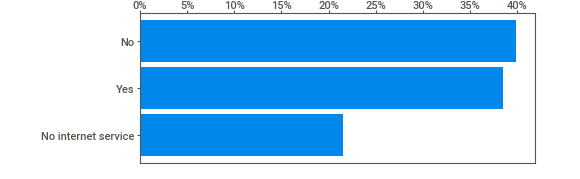
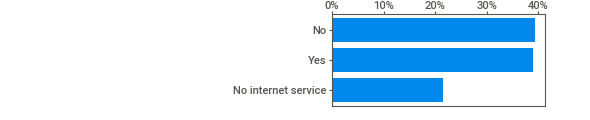
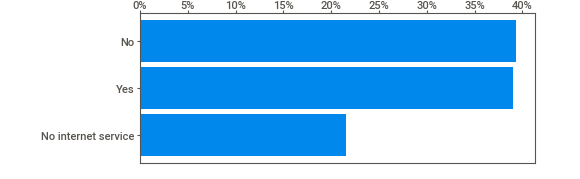
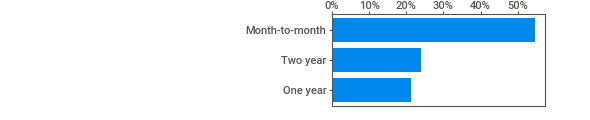
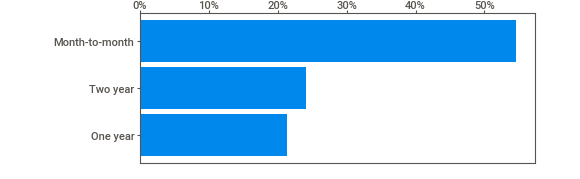
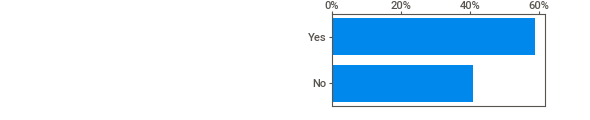
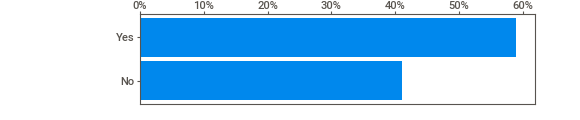
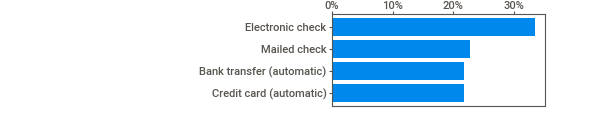
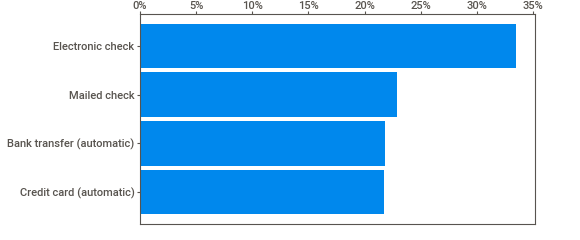
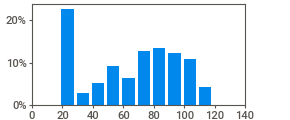
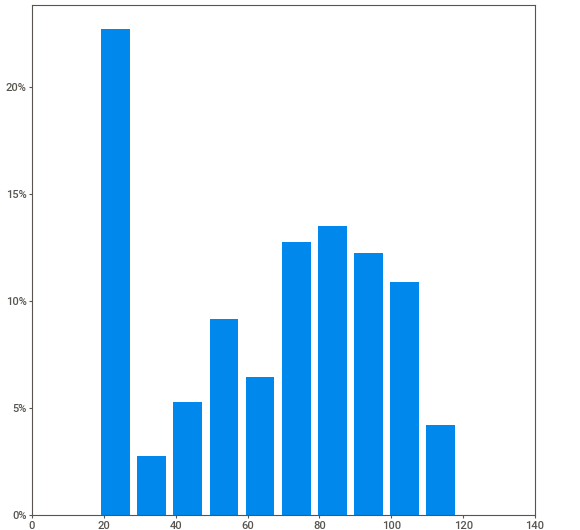
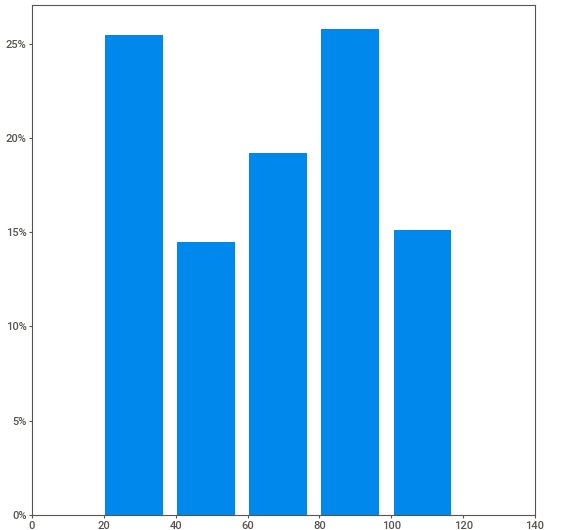
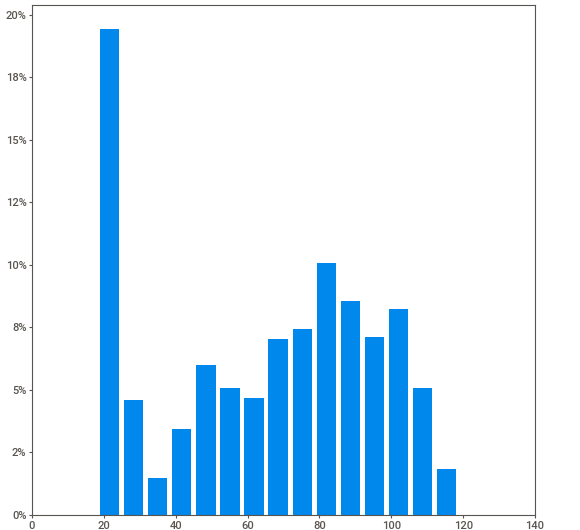
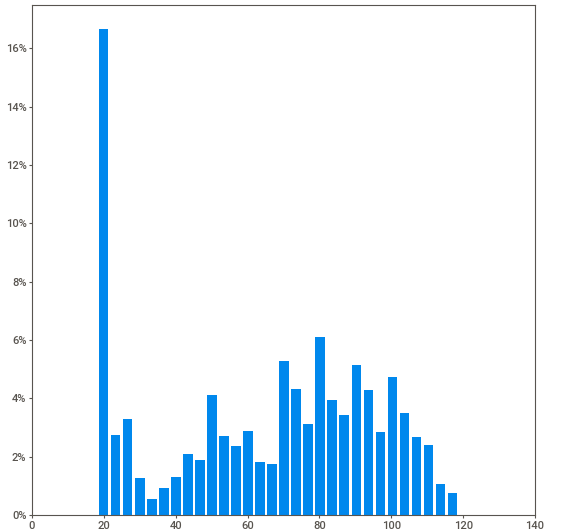
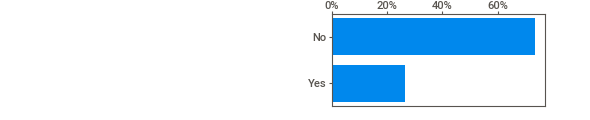
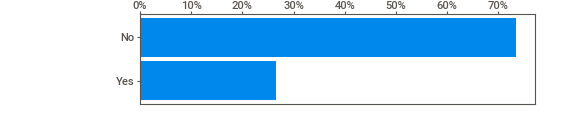
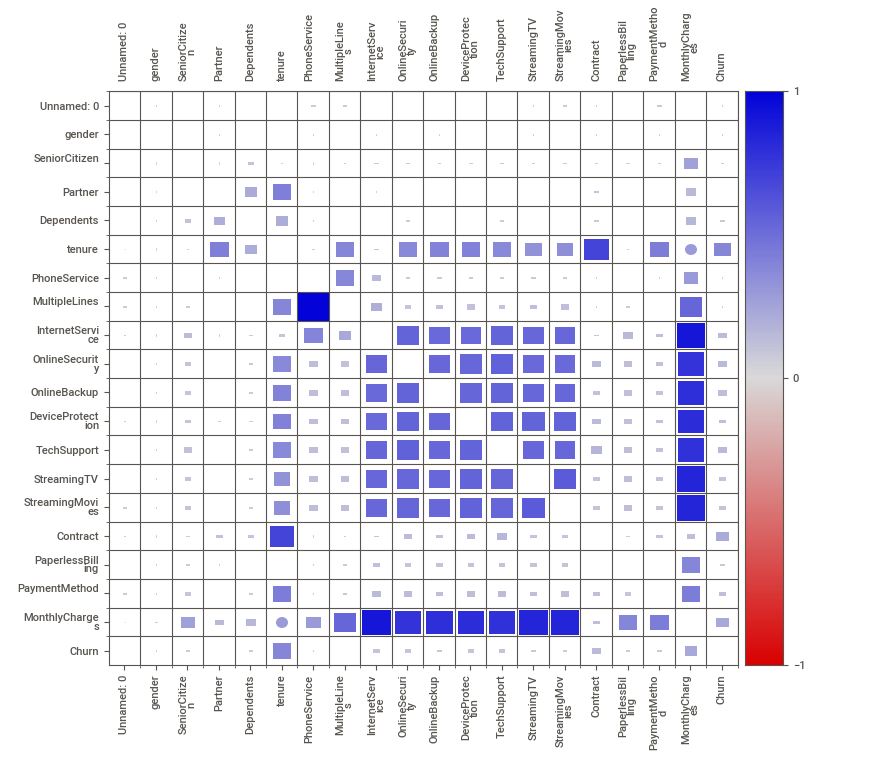
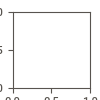

In [ ]:
# initial EDA with simlified tool
telco_eda = sv.analyze( telco_df)
telco_eda.show_notebook()

# Observations and Analysis


In [ ]:
# setup ML with pycaret
from pycaret.classification import *
setup_1 = setup(telco_df, target='Churn',ignore_features=['customerID','Unnamed: 0'])

,Description,Value
0,session_id,7638
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(5986, 22)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


# Effective Model Comparison

The question of effective model comparison is solved by Pycaret's 
`compare_models()` function that ranks different classification algorithms based on a certain sort criteria. It could be recall, AUC or accuracy etc.
The function also allows you to define a list of algorithms you wish to compare. 

To increase the effectiveness of this comparison function, it is imperative to perform feature engineering on the data for the best possible results

In [ ]:
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8019,0.8431,0.4897,0.6760,0.5677,0.4434,0.4533,14.716
lr,Logistic Regression,0.8000,0.8373,0.5301,0.6529,0.5847,0.4549,0.4595,17.936
ada,Ada Boost Classifier,0.7990,0.8408,0.5310,0.6499,0.5840,0.4533,0.4577,4.074
ridge,Ridge Classifier,0.7947,0.0000,0.4932,0.6497,0.5606,0.4300,0.4370,1.698
lightgbm,Light Gradient Boosting Machine,0.7888,0.8223,0.5077,0.6282,0.5608,0.4239,0.4285,0.564
rf,Random Forest Classifier,0.7871,0.8226,0.4501,0.6434,0.5289,0.3969,0.4080,5.265
et,Extra Trees Classifier,0.7776,0.8094,0.4438,0.6134,0.5140,0.3748,0.3836,7.791
dt,Decision Tree Classifier,0.7675,0.6873,0.5140,0.5708,0.5398,0.3851,0.3868,0.479
knn,K Neighbors Classifier,0.7632,0.7685,0.5041,0.5609,0.5304,0.3729,0.3742,2.545
svm,SVM - Linear Kernel,0.6735,0.0000,0.6935,0.4375,0.5035,0.3085,0.3512,2.805


In [ ]:
tuned = tune_model(best)
evaluate_model(tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7900,0.8392,0.4595,0.6456,0.5368,0.4060,0.4158
1,0.7924,0.8344,0.4414,0.6622,0.5297,0.4033,0.4169
2,0.7924,0.8368,0.4324,0.6667,0.5246,0.3994,0.4147
3,0.8091,0.8432,0.4505,0.7246,0.5556,0.4423,0.4626
4,0.7757,0.8341,0.4234,0.6104,0.5000,0.3614,0.3715
5,0.8019,0.8359,0.4324,0.7059,0.5363,0.4195,0.4398
6,0.7924,0.8240,0.4595,0.6538,0.5397,0.4109,0.4215
7,0.7924,0.8125,0.4196,0.6812,0.5193,0.3963,0.4152
8,0.8138,0.8655,0.4554,0.7500,0.5667,0.4570,0.4801
9,0.7947,0.7895,0.4554,0.6711,0.5426,0.4164,0.4294


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…